In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [25]:
# X is a matrix resulting from a dimensionality reduction method such as PCA
# Y is a list of labels for each instance
# c1 and c2 are column indices corresponding to the components that we wish to plot
# N is the number of instances
def nice_scatterplot(X, Y, c1, c2, N): 
    lbl1 = f'Component {c1}'
    lbl2 = f'Component {c2}'        
    df = pd.DataFrame({lbl1:X[:N,c1], lbl2:X[:N,c2], 'label':Y[:N]})
    sns.lmplot(data=df, x=lbl1, y=lbl2, fit_reg=False, hue='label', scatter_kws={'alpha':0.5}) 

In [84]:
data_path = '/local_storage/users/sbroome/painface-recognition/'
path_to_features = 'lps/video_level_features_132766bestmodel_320dim_zeropad_noresample/'
path = data_path + path_to_features

subj_codes = ['A', 'B', 'H', 'I', 'J', 'K', 'N', 'S']
df_summary = pd.read_csv(path + 'summary.csv')

In [85]:
def get_data(df_summary):

    default_array_str = 'arr_0'


    features_all = []
    preds_all = []
    labels_all = []
    subjects_all = []
    
    for subj_ind, subj_code in enumerate(subj_codes):
        df = df_summary[(df_summary.subject == subj_code)]

        for ind, row in df.iterrows():
            print('Index in df: ', ind, end='\r')
            video_id = str(row['video_id'])
            npz_path = path + video_id + '.npz'
            loaded = np.load(npz_path, allow_pickle=True)[default_array_str].tolist()
            feats = loaded['features'].astype(np.float32)
            f_shape = feats.shape
            preds = np.array(loaded['preds']).astype(np.float32)
            labels = np.array(loaded['labels']).astype(np.int32)
            features_all.append(feats)
            preds_all.append(preds)
            labels_all.append(labels)
            subjects_all.append(subj_ind)
    return features_all, preds_all, labels_all, subjects_all

In [87]:
feats, preds, labels, subjects = get_data(df_summary)
feats = np.asarray(feats)
preds = np.asarray(preds)
labels = np.asarray(labels)
subjects = np.asarray(subjects)

In [88]:
print('Data shapes: feats {},  preds {}, labels {}, subjects {}'.format(feats.shape, preds.shape, labels.shape, subjects.shape))

Data shapes: feats (100, 144, 320),  preds (100, 144, 2), labels (100, 144, 2), subjects (100,)


### But TSNE needs 2-dimensional features and 1-dimensional labels

Below, I visualize each single clip (320 dimensions) without taking the temporal context into account.

In [89]:
all_clips = np.reshape(feats, (-1, 320))
all_preds = np.reshape(preds, (-1, 2))
all_labels = np.argmax(np.reshape(labels, (-1, 2)), axis=1)

print('Data shapes: feats {},  preds {}, labels {}, subjects {}'.format(all_clips.shape, all_preds.shape, all_labels.shape, subjects.shape))

Data shapes: feats (14400, 320),  preds (14400, 2), labels (14400,), subjects (100,)


In [49]:
N=5000

In [50]:
tsne = TSNE()
feats_TSNE = tsne.fit_transform(all_clips[:N])

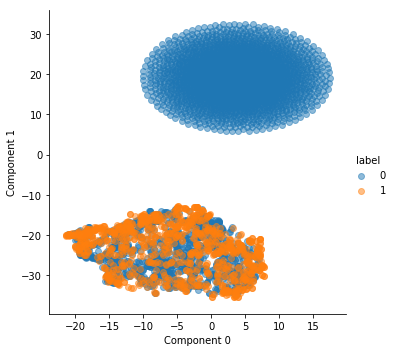

In [51]:
nice_scatterplot(feats_TSNE, all_labels[:N], 0, 1, N=N)

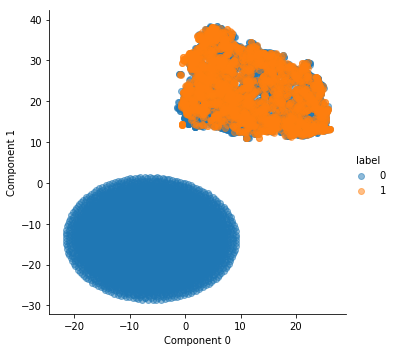

In [52]:
N=14400
tsne = TSNE()
feats_TSNE = tsne.fit_transform(all_clips[:N])
nice_scatterplot(feats_TSNE, all_labels[:N], 0, 1, N=N)

But I also want to visualize each clip and see if it gets any less confusing then.

In [90]:
all_clips = np.reshape(feats, (100, -1))
all_preds = np.reshape(preds, (100,  -1))
all_labels = np.argmax(labels[:,0,:], axis=1)
print('Data shapes: feats {},  preds {}, labels {}'.format(all_clips.shape, all_preds.shape, all_labels.shape))

Data shapes: feats (100, 46080),  preds (100, 288), labels (100,)


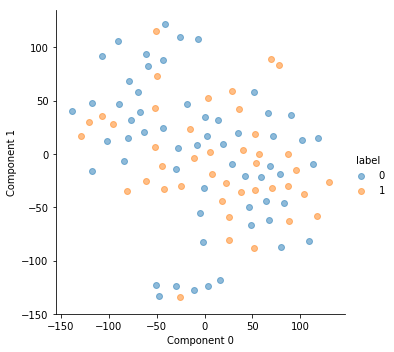

In [91]:
N=100
tsne = TSNE()
feats_TSNE = tsne.fit_transform(all_clips[:N])
nice_scatterplot(feats_TSNE, all_labels[:N], 0, 1, N=N)

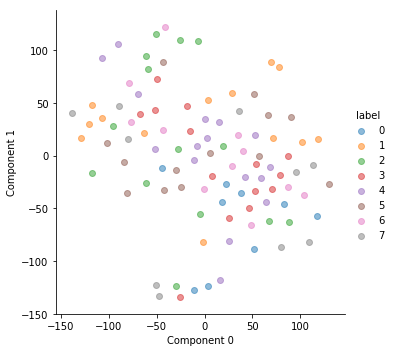

In [92]:
nice_scatterplot(feats_TSNE, subjects, 0, 1, N=N)

## Trying with 20480 dimensions instead

In [61]:
data_path = '/local_storage/users/sbroome/painface-recognition/'
path_to_features = 'lps/video_level_features_132766bestmodel_20480dim_zeropad_noresample/'
path = data_path + path_to_features

subj_codes = ['A', 'B', 'H', 'I', 'J', 'K', 'N', 'S']
df_summary = pd.read_csv(path + 'summary.csv')
feats, preds, labels = get_data(df_summary)
feats = np.asarray(feats)
preds = np.asarray(preds)
labels = np.asarray(labels)

In [62]:
print('Data shapes: feats {},  preds {}, labels {}'.format(feats.shape, preds.shape, labels.shape))

Data shapes: feats (100, 144, 20480),  preds (100, 144, 2), labels (100, 144, 2)


In [63]:
all_clips = np.reshape(feats, (100, -1))
all_preds = np.reshape(preds, (100,  -1))
all_labels = np.argmax(labels[:,0,:], axis=1)
print('Data shapes: feats {},  preds {}, labels {}'.format(all_clips.shape, all_preds.shape, all_labels.shape))

Data shapes: feats (100, 2949120),  preds (100, 288), labels (100,)


In [96]:
sum(all_labels)

42

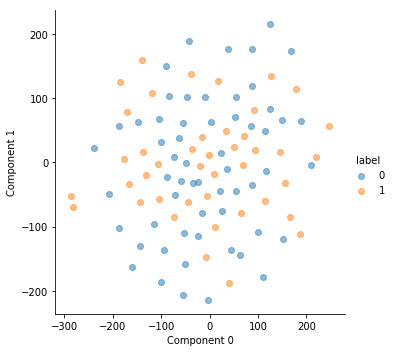

In [66]:
N=100
tsne = TSNE()
feats_TSNE = tsne.fit_transform(all_clips[:N])
nice_scatterplot(feats_TSNE, all_labels[:N], 0, 1, N=N)

In [68]:
all_clips = np.reshape(feats, (-1, 20480))
all_preds = np.reshape(preds, (-1, 2))
all_labels = np.argmax(np.reshape(labels, (-1, 2)), axis=1)
print('Data shapes: feats {},  preds {}, labels {}'.format(all_clips.shape, all_preds.shape, all_labels.shape))

Data shapes: feats (14400, 20480),  preds (14400, 2), labels (14400,)


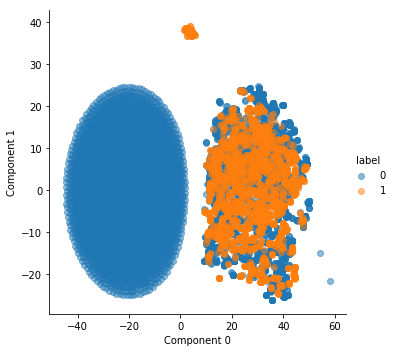

In [69]:
N=14400
tsne = TSNE()
feats_TSNE = tsne.fit_transform(all_clips[:N])
nice_scatterplot(feats_TSNE, all_labels[:N], 0, 1, N=N)

In [78]:
def get_data_subject_labels(df_summary):

    default_array_str = 'arr_0'

    subjects_all = []
    
    for subj_ind, subj_code in enumerate(subj_codes):
        df = df_summary[(df_summary.subject == subj_code)]

        for ind, row in df.iterrows():
            print('Index in df: ', ind, end='\r')
#             video_id = str(row['video_id'])
#             npz_path = path + video_id + '.npz'
#             loaded = np.load(npz_path, allow_pickle=True)[default_array_str].tolist()
#             feats = loaded['features'].astype(np.float32)
#             f_shape = feats.shape
#             preds = np.array(loaded['preds']).astype(np.float32)
#             labels = np.array(loaded['labels']).astype(np.int32)
#             features_all.append(feats)
#             preds_all.append(preds)
#             labels_all.append(labels)
            subjects_all.append(subj_ind)
    #return features_all, preds_all, labels_all, subjects_all
    return subjects_all

In [79]:
subjects_all = get_data_subject_labels(df_summary)
subjects = np.asarray(subjects_all)
print('Data shapes: feats {},  preds {}, labels {}, subjects {}'.format(feats.shape, preds.shape, labels.shape, subjects.shape))

Data shapes: feats (100, 144, 20480),  preds (100, 144, 2), labels (100, 144, 2), subjects (100,)


In [80]:
all_clips = np.reshape(feats, (100, -1))
all_preds = np.reshape(preds, (100,  -1))
all_labels = np.argmax(labels[:,0,:], axis=1)
print('Data shapes: feats {},  preds {}, labels {}'.format(all_clips.shape, all_preds.shape, all_labels.shape))

Data shapes: feats (100, 2949120),  preds (100, 288), labels (100,)


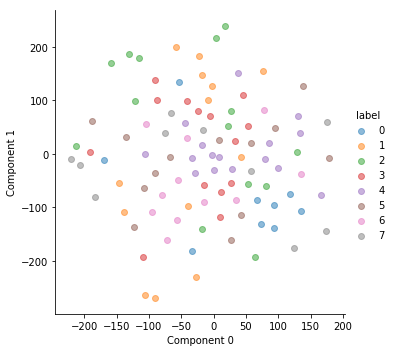

In [81]:
N=100
tsne = TSNE()
feats_TSNE = tsne.fit_transform(all_clips[:N])
nice_scatterplot(feats_TSNE, subjects[:N], 0, 1, N=N)

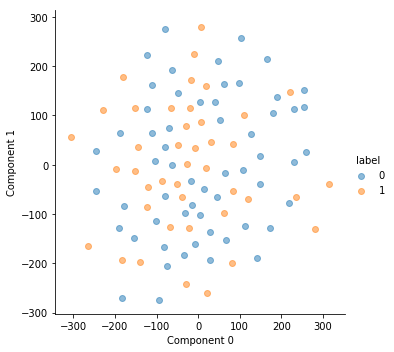

In [82]:
N=100
tsne = TSNE()
feats_TSNE = tsne.fit_transform(all_clips[:N])
nice_scatterplot(feats_TSNE, all_labels[:N], 0, 1, N=N)

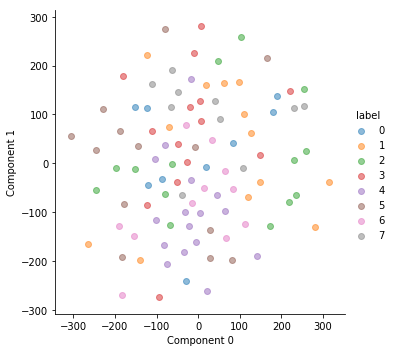

In [83]:
nice_scatterplot(feats_TSNE, subjects[:N], 0, 1, N=N)